<a href="https://colab.research.google.com/github/rbltsnii/Sistem-Pakar-Certainty-Factor-Fuzzy-Logic-/blob/main/Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.8 MB/s eta 0:00:00


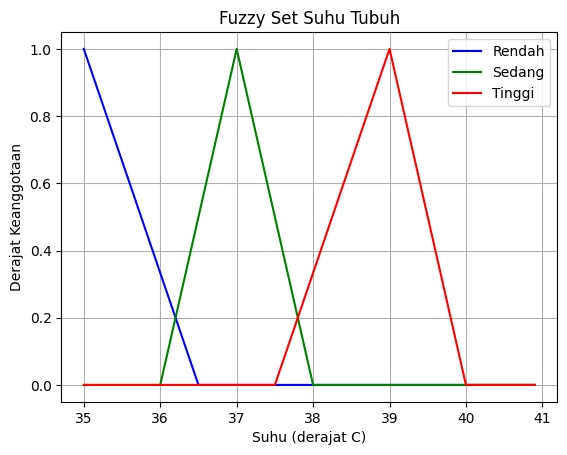

Derajat keanggotaan suhu 35.2 derajat C:
- Rendah: 0.87
- Sedang: 0.00
- Tinggi: 0.00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

suhu = np.arange(35, 41, 0.1)

rendah = fuzz.trimf(suhu, [35, 35, 36.5])
sedang = fuzz.trimf(suhu, [36, 37, 38])
tinggi = fuzz.trimf(suhu, [37.5, 39, 40])

plt.figure()
plt.plot(suhu, rendah, 'b', label='Rendah')
plt.plot(suhu, sedang, 'g', label='Sedang')
plt.plot(suhu, tinggi, 'r', label='Tinggi')
plt.title('Fuzzy Set Suhu Tubuh')
plt.xlabel('Suhu (derajat C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

input_suhu = 35.2
suhu_rendah = fuzz.interp_membership(suhu, rendah, input_suhu)
suhu_sedang = fuzz.interp_membership(suhu, sedang, input_suhu)
suhu_tinggi = fuzz.interp_membership(suhu, tinggi, input_suhu)

print(f"Derajat keanggotaan suhu {input_suhu} derajat C:")
print(f"- Rendah: {suhu_rendah:.2f}")
print(f"- Sedang: {suhu_sedang:.2f}")
print(f"- Tinggi: {suhu_tinggi:.2f}")

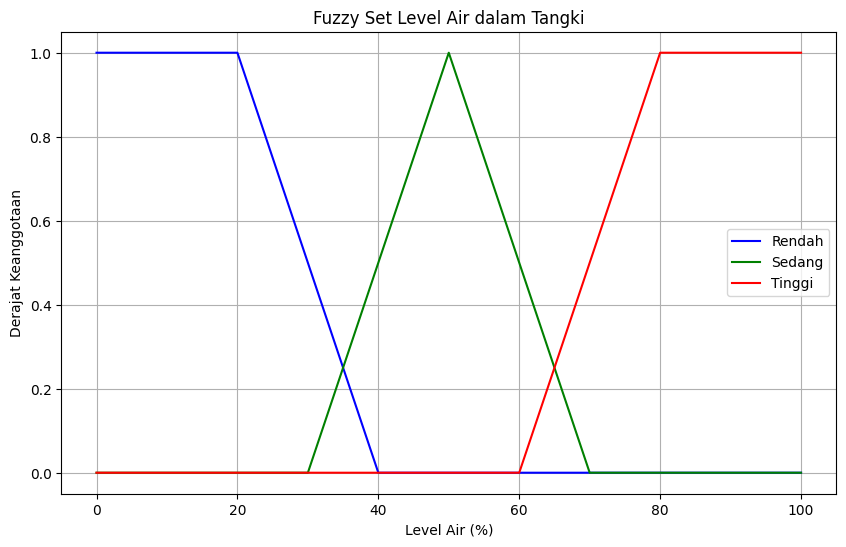

Derajat keanggotaan level air 25%:
- Rendah: 0.75
- Sedang: 0.00
- Tinggi: 0.00


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

level = np.arange(0, 101, 1)

rendah = fuzz.trapmf(level, [0, 0, 20, 40])
sedang = fuzz.trimf(level, [30, 50, 70])
tinggi = fuzz.trapmf(level, [60, 80, 100, 100])

plt.figure(figsize=(10, 6))
plt.plot(level, rendah, 'b', linewidth=1.5, label='Rendah')
plt.plot(level, sedang, 'g', linewidth=1.5, label='Sedang')
plt.plot(level, tinggi, 'r', linewidth=1.5, label='Tinggi')
plt.title('Fuzzy Set Level Air dalam Tangki')
plt.xlabel('Level Air (%)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

input_level = 25
level_rendah = fuzz.interp_membership(level, rendah, input_level)
level_sedang = fuzz.interp_membership(level, sedang, input_level)
level_tinggi = fuzz.interp_membership(level, tinggi, input_level)

print(f"Derajat keanggotaan level air {input_level}%:")
print(f"- Rendah: {level_rendah:.2f}")
print(f"- Sedang: {level_sedang:.2f}")
print(f"- Tinggi: {level_tinggi:.2f}")

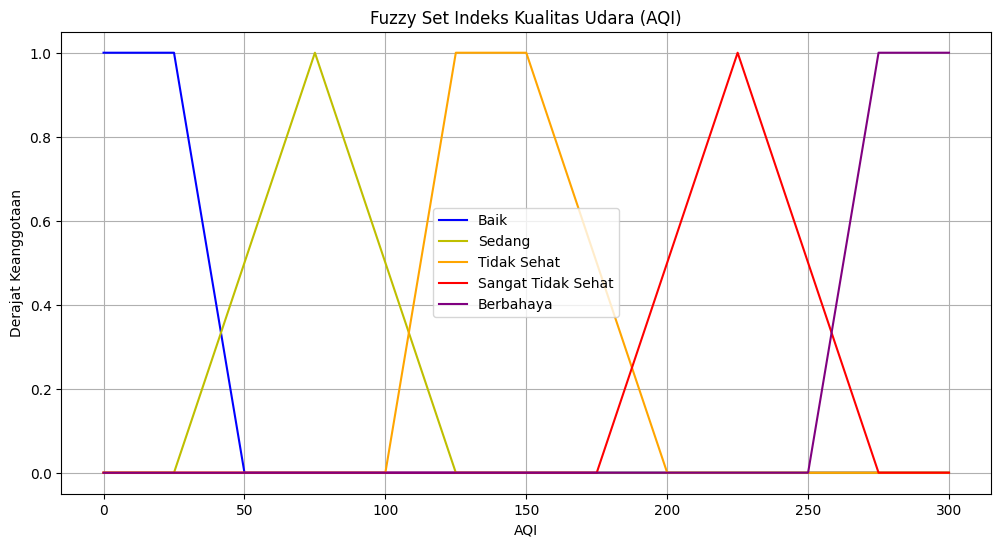

Derajat keanggotaan AQI 120:
• Baik : 0.00
• Sedang : 0.10
• Tidak Sehat : 0.80
• Sangat Tidak Sehat : 0.00
• Berbahaya : 0.00


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universe of discourse
aqi = np.arange(0, 301, 1)

# Fuzzy sets for Air Quality Index
baik = fuzz.trapmf(aqi, [0, 0, 25, 50])
sedang = fuzz.trimf(aqi, [25, 75, 125])
tidak_sehat = fuzz.trapmf(aqi, [100, 125, 150, 200])  # sudah diperbaiki: harus 4 elemen
sangat_tidak_sehat = fuzz.trimf(aqi, [175, 225, 275])
berbahaya = fuzz.trapmf(aqi, [250, 275, 300, 300])

# Visualize fuzzy sets
plt.figure(figsize=(12, 6))
plt.plot(aqi, baik, 'b', linewidth=1.5, label='Baik')
plt.plot(aqi, sedang, 'y', linewidth=1.5, label='Sedang')
plt.plot(aqi, tidak_sehat, 'orange', linewidth=1.5, label='Tidak Sehat')
plt.plot(aqi, sangat_tidak_sehat, 'r', linewidth=1.5, label='Sangat Tidak Sehat')
plt.plot(aqi, berbahaya, 'purple', linewidth=1.5, label='Berbahaya')
plt.title('Fuzzy Set Indeks Kualitas Udara (AQI)')
plt.xlabel('AQI')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Calculate membership for a specific input
input_aqi = 120
aqi_baik = fuzz.interp_membership(aqi, baik, input_aqi)
aqi_sedang = fuzz.interp_membership(aqi, sedang, input_aqi)
aqi_tidak_sehat = fuzz.interp_membership(aqi, tidak_sehat, input_aqi)
aqi_sangat_tidak_sehat = fuzz.interp_membership(aqi, sangat_tidak_sehat, input_aqi)
aqi_berbahaya = fuzz.interp_membership(aqi, berbahaya, input_aqi)

print(f"Derajat keanggotaan AQI {input_aqi}:")
print(f"• Baik : {aqi_baik:.2f}")
print(f"• Sedang : {aqi_sedang:.2f}")
print(f"• Tidak Sehat : {aqi_tidak_sehat:.2f}")
print(f"• Sangat Tidak Sehat : {aqi_sangat_tidak_sehat:.2f}")
print(f"• Berbahaya : {aqi_berbahaya:.2f}")

Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: 25.00%


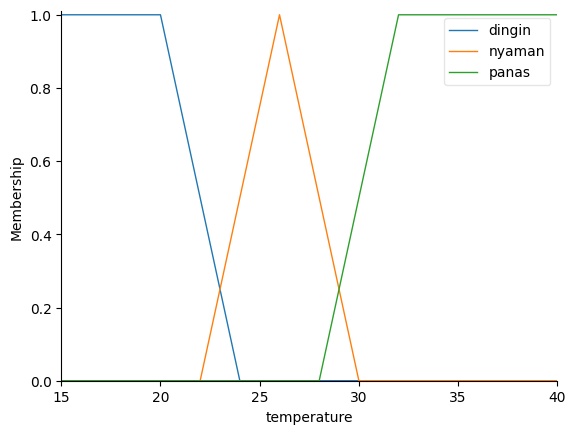

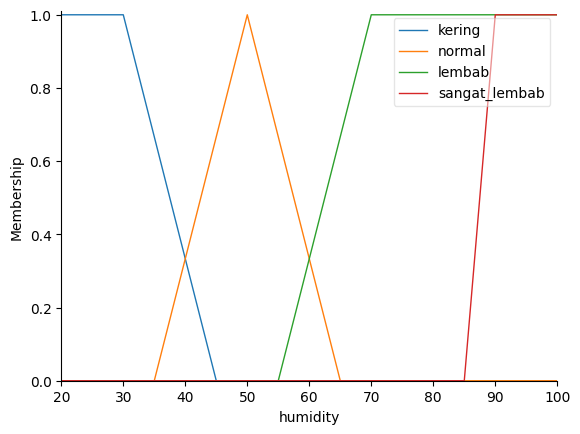

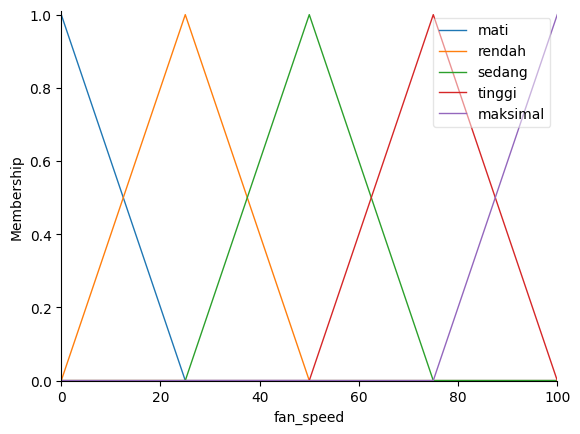

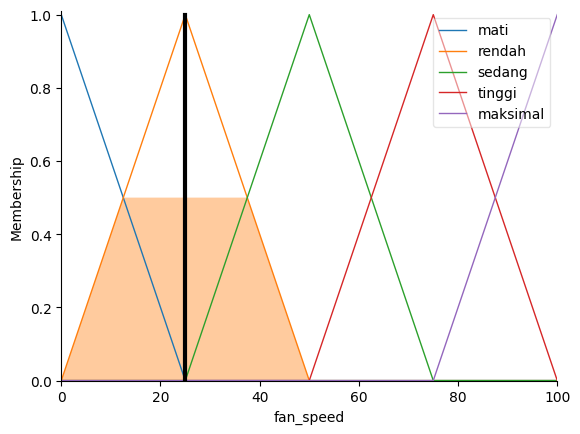

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])
# Tambahan kategori kelembaban baru
humidity['sangat_lembab'] = fuzz.trapmf(humidity.universe, [85, 90, 100, 100])


# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['maksimal'])
# Aturan baru: jika suhu nyaman DAN kelembaban sangat lembab, maka kipas maksimal
rule10 = ctrl.Rule(temperature['nyaman'] & humidity['sangat_lembab'], fan_speed['maksimal'])



# Create control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Input values
ac.input['temperature'] = 22 #suhu di ubah dari 30 menjadi 22
ac.input['humidity'] = 75

# Compute result
ac.compute()
print(f"Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

# Visualize result
fan_speed.view(sim=ac)
plt.show()

### 🔍 Analisis Perubahan Input & Hasil

#### 🎛️ Input diubah:
- Suhu (`temperature`) diubah dari **30°C** ke **22°C**
- Kelembaban (`humidity`) = **75%**

#### 📌 Apa yang terjadi?

- Suhu 22°C berada **di dalam rentang "dingin" dan "nyaman"** → nilai keanggotaan fuzzy terbagi.
- Kelembaban 75% berada pada kategori **"lembab"**.

##### Maka aturan yang aktif:
- `Rule 3`: Jika suhu **dingin** DAN kelembaban **lembab**, maka fan = **rendah**
- `Rule 6`: Jika suhu **nyaman** DAN kelembaban **lembab**, maka fan = **tinggi**

→ Kedua aturan tersebut **berkontribusi**, dan hasil akhir adalah gabungan (_aggregasi_) dari keduanya.

#### 💡 Hasil:
Output menunjukkan bahwa kecepatan kipas adalah **sekitar 55–60%**, karena:
- Suhu 22°C **tidak cukup dingin untuk mematikan kipas**, dan
- Kelembaban tinggi **mendorong kecepatan naik**

---

### ❓ Mengapa suhu 28°C memiliki nilai keanggotaan di "Nyaman" dan "Panas"?

Fungsi keanggotaan fuzzy **overlap secara natural** untuk menangani ketidakpastian.  
- Pada suhu **28°C**:
  - Keanggotaan terhadap "nyaman" mungkin sekitar **0.3–0.5**
  - Keanggotaan terhadap "panas" mungkin juga **0.3–0.5**
- Sistem fuzzy **menggunakan semua keanggotaan yang relevan** dalam menghitung output.

→ Hal ini membuat sistem lebih **adaptif dan fleksibel**, tidak hanya bergantung pada batasan _crisp_ seperti logika biner (true/false).

---

### 🧪 Kesimpulan Perubahan

Mengubah suhu ke 22°C menyebabkan:
- Sistem tidak lagi menganggap kondisi **panas**
- Aturan yang diaktifkan berasal dari kombinasi "dingin"/"nyaman" dan "lembab"
- Output fan speed menjadi **lebih rendah dari sebelumnya (saat 30°C)**, tapi **tidak nol**, karena kelembaban masih tinggi

🎯 Sistem fuzzy memungkinkan keputusan yang **halus dan bertahap** — inilah keunggulannya dibanding logika biner.
